<a href="https://colab.research.google.com/github/shivraj7/numpy/blob/main/Scalar_Day42_numpy_4_29_march_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vectorization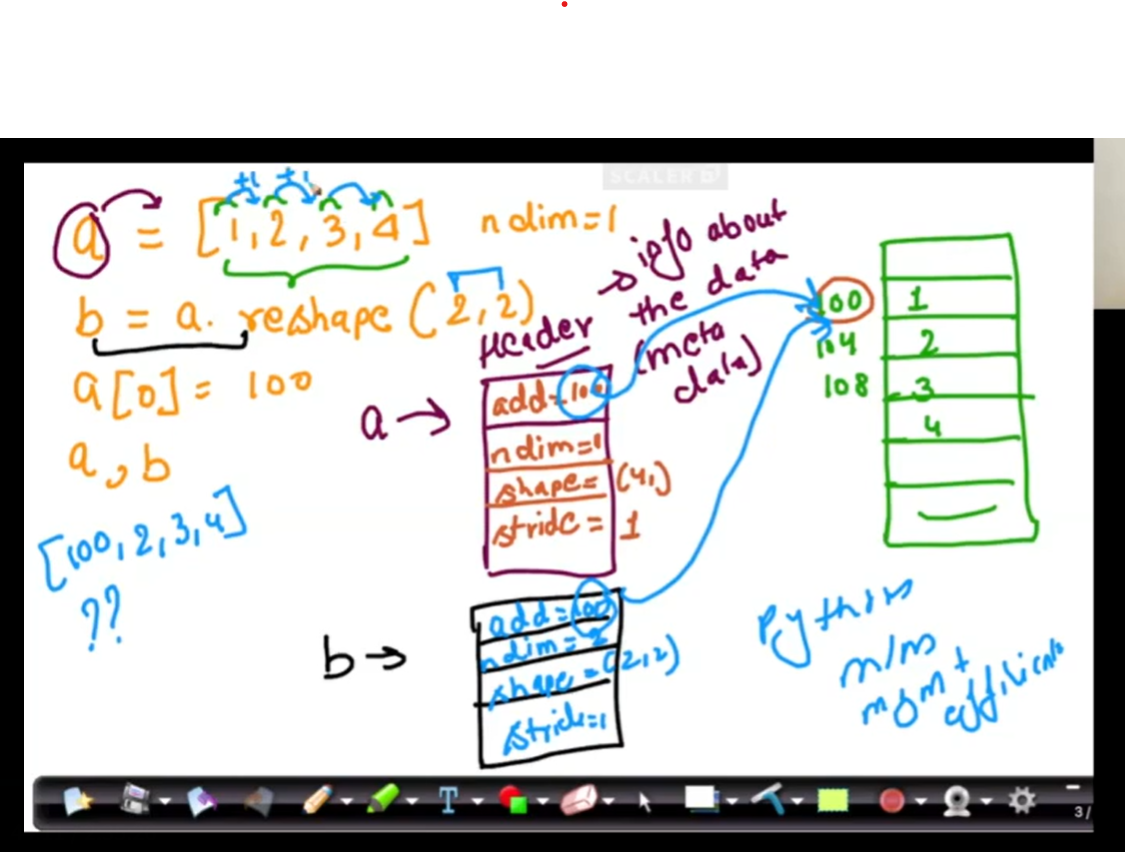

In [1]:
import numpy as np
import math

In [2]:
a = np.array([1,2,3,4])

In [3]:
math.factorial(3)

6

In [5]:
math.factorial(a)

TypeError: only integer scalar arrays can be converted to a scalar index

In [12]:
#non vectorization
for i in a:
  print(math.factorial(i))


1
2
6
24


In [11]:
#vectorization
np_factorial=np.vectorize(math.factorial)
np_factorial(a)

array([ 1,  2,  6, 24])

#Shallow copy Vs Deep Copy

In [23]:
#shallow copy
l1 = [1,2,3,4]
l2 = l1 #no new memory, same memory as l1, this is shallow copy

In [17]:
# list is mutable, In programming, "mutable" refers to an object whose state or content can be modified after it is created.
l1[0] = 20
l1

[20, 2, 3, 4]

In [18]:
l2

[20, 2, 3, 4]

In [22]:
# print memory location
print(id(l1))
print(id(l2))

138718549324672
138718549324672


In [28]:
#deep copy
l1 = [1,2,3,4]
l2 = l1.copy()
l1[0] = 5
print(l1, id(l1))
print(l2, id(l2))

[5, 2, 3, 4] 138718547584000
[1, 2, 3, 4] 138719551388416


#Array

In [29]:
a = np.array([1,2,3,4])

In [31]:
b = a+1 #will create new memory for output b so deep copy
b

array([2, 3, 4, 5])

In [32]:
a**2

array([ 1,  4,  9, 16])

In [34]:
#new example
a = np.array([1,2,3,4])
b = a.reshape(2,2) #shallow copy operation
print(a)
print(b)
a[0] =5
print(a)
print(b)

[1 2 3 4]
[[1 2]
 [3 4]]
[5 2 3 4]
[[5 2]
 [3 4]]


In [38]:
#how to check 2 object have same memory or not

# method 1 : wiht help of id() function
#id(l1) = id(l2)

#method 2: np.shares_mmory(l1,l2)
np.shares_memory(a,b)

True

In [47]:
# creating deep copy
a = np.arange(9)
print(a)
deep_a = np.copy(a)
print("Is deep_a is shallow copy:-", np.shares_memory(a, deep_a))

[0 1 2 3 4 5 6 7 8]
Is deep_a is shallow copy False


In [50]:
# creating shallow copy
a = np.arange(9)
print(a)
shallow_a = a.view()
print("Is shallow_a is shallow copy:-", np.shares_memory(a, shallow_a))

[0 1 2 3 4 5 6 7 8]
Is shallow_a is shallow copy:- True


In [62]:
# elementwise, masking all these will create deep copy
a = np.arange(4)
print("a:-",a)
b = a[a%1==0]
print("b:-", b)
b[0] = 10
print("b:-",b)
print("a:-",a)
print("a and b share memory:- ", np.shares_memory(a,b))

a:- [0 1 2 3]
b:- [0 1 2 3]
b:- [10  1  2  3]
a:- [0 1 2 3]
a and b share memory:-  False


In [64]:
#Array Spliting/Sub array

In [72]:
a = np.arange(9)
print("a:-",a)
b = np.split(a,3) #deep copy
print("b:-", b)
print(np.shares_memory(a,b))


a:- [0 1 2 3 4 5 6 7 8]
b:- [array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]
False


In [73]:
a = np.arange(9)
b = np.split(a, 4)

ValueError: array split does not result in an equal division

In [27]:
a = np.arange(9)# unequal length,
print(a)
np.split(a, (3,5,6)) # here 3,5,6 are end indices of subarray
# here ouput subarray are
#[0 1 2] --> index 0 to 2----> index <3
#[3 4]-----> index 3 to 5----> index >=3 and <5
#[5]-------> index 5--------->index >=5 and <6
#[6 7 8]--->remaining all index

[0 1 2 3 4 5 6 7 8]


[array([0, 1, 2]), array([3, 4]), array([5]), array([6, 7, 8])]

In [81]:
np.split(a,(3,4,1,1))

[array([0, 1, 2]),
 array([3]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([1, 2, 3, 4, 5, 6, 7, 8])]

#2d array spliting

In [83]:
a= np.arange(16).reshape(4,4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [86]:
b = np.split(a,2, axis=1)
print(b)

[array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])]


In [88]:
c = np.split(a,2,axis=0)
c

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])]

In [90]:
d = np.hsplit(a,2)
d

[array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]])]

In [91]:
e = np.vsplit(a,2)
e

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])]

#merging/stacking

In [92]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [96]:
b = np.arange(5,10)
b


array([5, 6, 7, 8, 9])

In [98]:
c = np.vstack((a,b))
c

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [101]:
d = np.hstack((a,b))
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [102]:
np.vstack((a,a,a))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [107]:
a = np.array([[1],[2],[3]])
b = np.array([[4],[5],[6]])
c = np.vstack((a,b))
print(c)
d = np.hstack((a,b))
print(d)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1 4]
 [2 5]
 [3 6]]


#Broadcasting

Rule 1 : If two array differ in the number of dimensions, the shape of one with fewer dimensions is padded with ones on its
leading( Left Side).
Rule 2 : If the shape of two arrays doesnt match in any dimensions, the array with shape equal to 1 is stretched to match
the other shape.


In [109]:
a = np.arange(0,40,10)
a

array([ 0, 10, 20, 30])

In [111]:
b = np.vstack((a,a,a))
b

array([[ 0, 10, 20, 30],
       [ 0, 10, 20, 30],
       [ 0, 10, 20, 30]])

In [114]:
np.tile(a,(2,3))

array([[ 0, 10, 20, 30,  0, 10, 20, 30,  0, 10, 20, 30],
       [ 0, 10, 20, 30,  0, 10, 20, 30,  0, 10, 20, 30]])

In [120]:
a = np.arange(0,40,10)
a = np.tile(a,(3,1))
a = a.T
b = np.arange(3)
b = np.tile(b,(4,1))
print(a)
print(b)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]]
[[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]


In [121]:
a+b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [124]:
a = np.arange(8).reshape(2,4)
b = np.arange(16).reshape(4,4)
a,b

(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]))

In [125]:
a+b

ValueError: operands could not be broadcast together with shapes (2,4) (4,4) 

In [131]:
a= np.array([1,2,3,4])
b = np.arange(12).reshape(4,3)
print(a.shape) # its shape is (4,) after applying rule 1 of broadcasting shape will be (1,4)
print(a)
print(b.shape) #shape of b is (4,3)
print(b)
a+b # shape (1,4) and (4,3) is not broadcastable

(4,)
[1 2 3 4]
(4, 3)
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (4,) (4,3) 

In [130]:
a= np.array([1,2,3,4]) # its shape is (4,) after applying rule 1 of broadcasting shape will be (1,4)
b = np.arange(12).reshape(3,4)
print(a.shape)
print(a)
print(b.shape)#shape of b is (4,3)
print(b)
a+b # shape (1,4) and (3,4) is not broadcastable

(4,)
[1 2 3 4]
(3, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[ 1,  3,  5,  7],
       [ 5,  7,  9, 11],
       [ 9, 11, 13, 15]])

#assignment Q1

In [10]:
import numpy as np
mat = np.array([[1,2], [3,4], [5,6]])
print(mat)
r,c = mat.shape
print(r,c)
top = np.zeros((1,c), dtype=int)
print(top)
left = np.zeros((r +2, 1), dtype = int)
print(left)
res = np.vstack((top,mat,top))
print(res)

[[1 2]
 [3 4]
 [5 6]]
3 2
[[0 0]]
[[0]
 [0]
 [0]
 [0]
 [0]]
[[0 0]
 [1 2]
 [3 4]
 [5 6]
 [0 0]]


#assignment Q7

In [22]:
import numpy as np
arr = np.array([[1,2,3],
               [4,5,6],
               [7,8,9]])

print(arr[:, 0].shape)
print(arr[:, 0:1].shape)
print(arr[:, [0]].shape)

np.hstack((arr, arr[:, 0])).shape #will throug error as dimension are different here

(3,)
(3, 1)
(3, 1)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

#Assignment Q4

In [24]:
import numpy as np
arr = np.arange(16).reshape(4,4)
print(arr)
print(np.split(arr,4))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]]), array([[12, 13, 14, 15]])]


#assignment Q5

In [33]:
arr = np.array([1,2,3,0,-2,4])
arr1 = arr*1
print(np.shares_memory(arr,arr1))
arr1 = arr[:]
print(np.shares_memory(arr,arr1))
arr1 = arr[arr > 0]
print(np.shares_memory(arr,arr1))
arr1 = arr.reshape(2,3)
print(np.shares_memory(arr,arr1))

False
True
False
True
